# weather data

In [29]:
import pandas as pd
import os

train_size = 1008 # 1000
test_size = 250 # 250
horizon = 50 # 50

path = os.path.join('results',f'weather_datatrain_{train_size}_test_{test_size}_horizon_{horizon}_weather__WITH_FINETUNING_results.csv')


df = pd.read_csv(path)
# get name of the file without the .csv
name_of_file = os.path.basename(path).split('.')[0]
name_of_file = name_of_file + "_weather"
name_of_file

'weather_datatrain_1008_test_250_horizon_50_weather__WITH_FINETUNING_results_weather'

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Initialize lists to store metrics
maes = []
rmses = []
mapes = []

# Group by 'RollingOrigin' and calculate metrics for each group
for _, group in df.groupby('RollingOrigin'):
    y_true = group['Actual']
    y_pred = group['TimeGPT']
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    # Append metrics to lists
    maes.append(mae)
    rmses.append(rmse)
    mapes.append(mape)

# Calculate the mean and standard deviation of the metrics
mae_mean = np.mean(maes)
mae_std = np.std(maes)
rmse_mean = np.mean(rmses)
rmse_std = np.std(rmses)
mape_mean = np.mean(mapes)
mape_std = np.std(mapes)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Source': [name_of_file],
    'MAE': [mae_mean],
    'MAE_std': [mae_std],
    'RMSE': [rmse_mean],
    'RMSE_std': [rmse_std],
    'MAPE': [mape_mean],
    'MAPE_std': [mape_std]
})
print(results)

# save the results
results.to_csv(os.path.join('error_metrics',f'{name_of_file}.csv'), index=False)

                                              Source       MAE   MAE_std  \
0  weather_datatrain_1008_test_250_horizon_50_wea...  2.342171  0.988625   

       RMSE  RMSE_std          MAPE      MAPE_std  
0  2.808237  1.060507  1.819037e+14  2.444959e+14  


# Climate data

In [4]:
import pandas as pd
import os

train_size = 1000
test_size = 50
horizon = 10
model1 = 'timegpt-1'
model2 = 'timegpt-1-long-horizon'

path = os.path.join('results','climate_data', f'train_{train_size}_test_{test_size}_horizon_{horizon}_modeltype_{model1}_climate_results.csv')

df = pd.read_csv(path)
# get name of the file without the .csv
name_of_file = os.path.basename(path).split('.')[0]
name_of_file
df

,date,TimeGPT,Actual,RollingOrigin
0,1953-06-01,0.575735,0.343228,0
1,1953-07-01,0.706922,0.357698,0
2,1953-08-01,0.802228,0.185581,0
3,1953-09-01,0.636237,-0.048259,0
4,1953-10-01,0.464142,0.060318,0
...,...,...,...,...
405,1957-02-01,0.137916,-0.137413,40
406,1957-03-01,0.137567,0.060404,40
407,1957-04-01,0.142735,0.091391,40
408,1957-05-01,0.143780,0.002730,40


In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Initialize lists to store metrics
maes = []
rmses = []
mapes = []

def calculate_error_metrics_with_mase(df, name_of_file):
    maes, rmses, mapes, mases = [], [], [], []
    
    # Group by 'RollingOrigin' and calculate metrics for each group
    for _, group in df.groupby('RollingOrigin'):
        y_true = group['Actual'].values
        y_pred = group['TimeGPT'].values

        # Calculate metrics
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = mean_absolute_percentage_error(y_true, y_pred)
        mase = np.mean([abs(y_true[i] - y_pred[i]) / (abs(y_true[i] - y_true[i - 1]) / (len(y_true) - 1)) for i in range(1, len(y_true))])

        # Append metrics to lists
        maes.append(mae)
        rmses.append(rmse)
        mapes.append(mape)
        mases.append(mase)

    # Calculate the mean and standard deviation of the metrics
    mae_mean = np.mean(maes)
    mae_std = np.std(maes)
    rmse_mean = np.mean(rmses)
    rmse_std = np.std(rmses)
    mape_mean = np.mean(mapes)
    mape_std = np.std(mapes)
    mase_mean = np.mean(mases)
    mase_std = np.std(mases)

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'Source': [name_of_file],
        'MAE': [mae_mean],
        'MAE_std': [mae_std],
        'RMSE': [rmse_mean],
        'RMSE_std': [rmse_std],
        'MAPE': [mape_mean],
        'MAPE_std': [mape_std],
        'MASE': [mase_mean],
        'MASE_std': [mase_std]
    })
    print(results)
    return results

results = calculate_error_metrics_with_mase(df, name_of_file)

# save the results
results.to_csv(os.path.join('error_metrics',f'{name_of_file+"TESTTTT"}.csv'), index=False)

                                              Source       MAE   MAE_std  \
0  train_1000_test_50_horizon_10_modeltype_timegp...  0.153126  0.064758   

       RMSE  RMSE_std     MAPE  MAPE_std       MASE   MASE_std  
0  0.181398  0.065473  2.12848  1.937849  67.569216  64.243391  


# all files

In [11]:
# load all results files for weather data
import os
import pandas as pd

# Initialize an empty list to store the results
results = []

# Iterate over all files in the 'results' directory
for file in os.listdir('results/weather_data'):
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        # Read the file into a DataFrame
        df = pd.read_csv(os.path.join('results/weather_data', file))
        # Append the DataFrame to the list
        results.append(df)

results[1]

,DateTime,TimeGPT,Actual,RollingOrigin
0,2024-04-11 16:00:00,12.883865,13.7,0
1,2024-04-11 17:00:00,12.562263,13.5,0
2,2024-04-11 18:00:00,11.709729,12.8,0
3,2024-04-11 19:00:00,11.166174,11.2,0
4,2024-04-11 20:00:00,10.894749,10.0,0
...,...,...,...,...
10045,2024-04-21 21:00:00,4.143261,2.5,200
10046,2024-04-21 22:00:00,3.790940,1.4,200
10047,2024-04-21 23:00:00,3.484714,0.9,200
10048,2024-04-22 00:00:00,3.457513,0.8,200


In [19]:
results[1]["TimeGPT"].values

array([12.88386536, 12.56226254, 11.70972919, ...,  3.48471403,
        3.45751286,  3.39269066])

In [ ]:
np.mean(np.abs(results[1]["TimeGPT"] - results[1]["Actual"])) / np.mean(np.abs(train[:-1] - train[1:]))


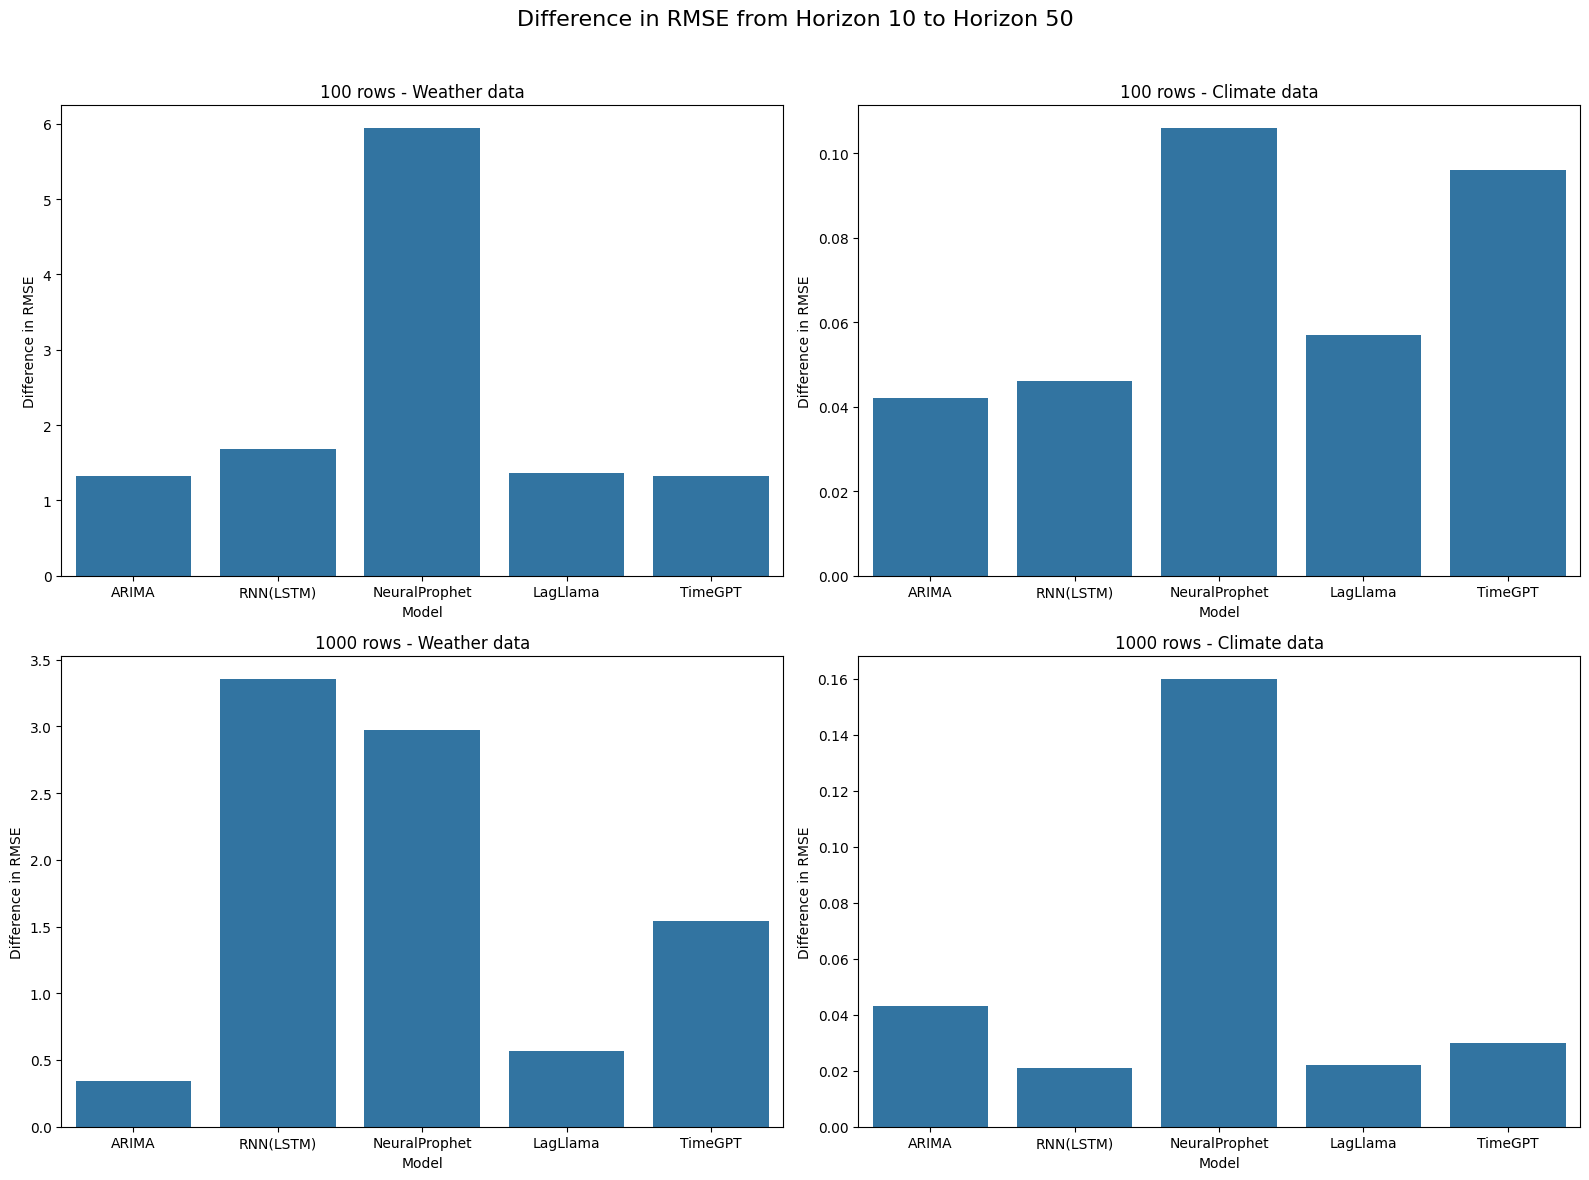

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data from the table
data = {
    'Model': ['ARIMA', 'RNN(LSTM)', 'NeuralProphet', 'LagLlama', 'TimeGPT'],
    '100_weather_10': [1.271, 1.659, 1.339, 1.351, 0.927],
    '100_weather_50': [2.589, 3.344, 7.285, 2.712, 2.247],
    '100_climate_10': [0.145, 0.132, 0.194, 0.131, 0.179],
    '100_climate_50': [0.187, 0.178, 0.300, 0.188, 0.275],
    '1000_weather_10': [2.069, 1.254, 1.302, 2.212, 1.164],
    '1000_weather_50': [2.415, 4.611, 4.273, 2.782, 2.705],
    '1000_climate_10': [0.153, 0.168, 0.191, 0.172, 0.181],
    '1000_climate_50': [0.196, 0.189, 0.351, 0.194, 0.211]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['100_weather_diff'] = df['100_weather_50'] - df['100_weather_10']
df['100_climate_diff'] = df['100_climate_50'] - df['100_climate_10']
df['1000_weather_diff'] = df['1000_weather_50'] - df['1000_weather_10']
df['1000_climate_diff'] = df['1000_climate_50'] - df['1000_climate_10']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Difference in RMSE from Horizon 10 to Horizon 50', fontsize=16)

# Plot 1: 100 rows, Weather data
sns.barplot(x='Model', y='100_weather_diff', data=df, ax=axes[0, 0])
axes[0, 0].set_title('100 rows - Weather data')
axes[0, 0].set_ylabel('Difference in RMSE')

# Plot 2: 100 rows, Climate data
sns.barplot(x='Model', y='100_climate_diff', data=df, ax=axes[0, 1])
axes[0, 1].set_title('100 rows - Climate data')
axes[0, 1].set_ylabel('Difference in RMSE')

# Plot 3: 1000 rows, Weather data
sns.barplot(x='Model', y='1000_weather_diff', data=df, ax=axes[1, 0])
axes[1, 0].set_title('1000 rows - Weather data')
axes[1, 0].set_ylabel('Difference in RMSE')

# Plot 4: 1000 rows, Climate data
sns.barplot(x='Model', y='1000_climate_diff', data=df, ax=axes[1, 1])
axes[1, 1].set_title('1000 rows - Climate data')
axes[1, 1].set_ylabel('Difference in RMSE')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

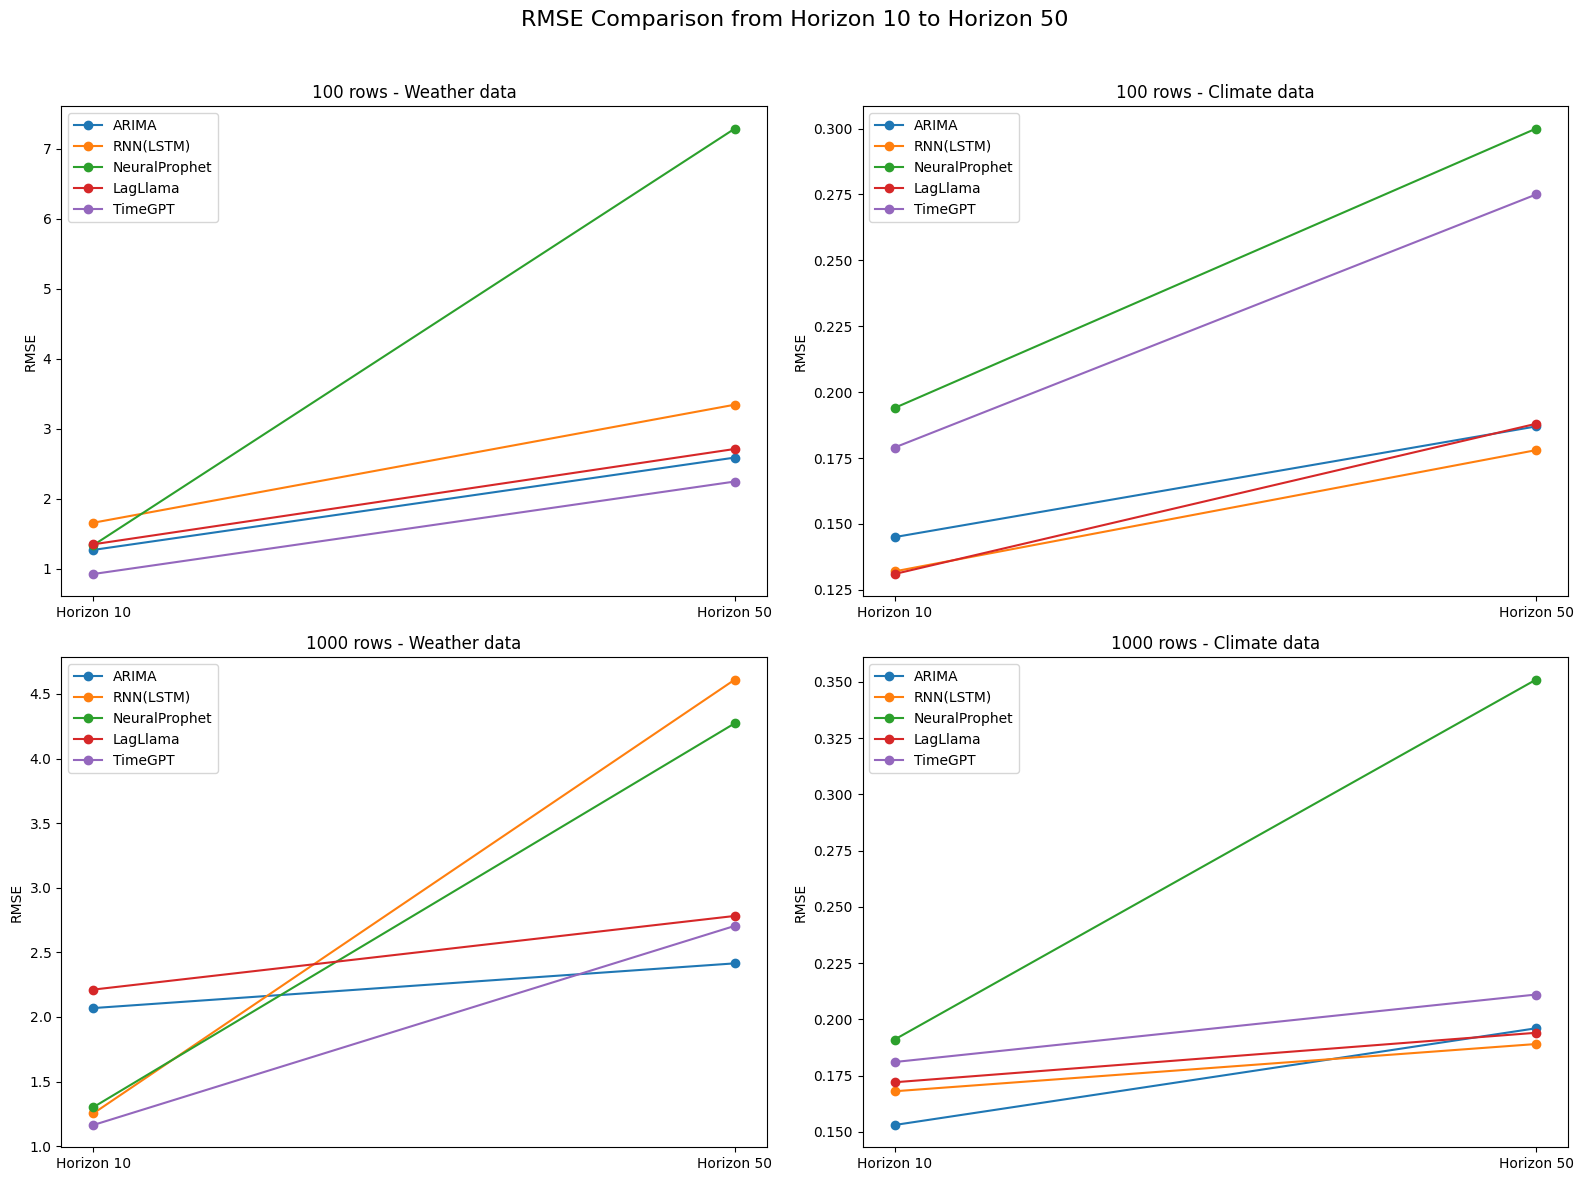

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Model': ['ARIMA', 'RNN(LSTM)', 'NeuralProphet', 'LagLlama', 'TimeGPT'],
    '100_weather_10': [1.271, 1.659, 1.339, 1.351, 0.927],
    '100_weather_50': [2.589, 3.344, 7.285, 2.712, 2.247],
    '100_climate_10': [0.145, 0.132, 0.194, 0.131, 0.179],
    '100_climate_50': [0.187, 0.178, 0.300, 0.188, 0.275],
    '1000_weather_10': [2.069, 1.254, 1.302, 2.212, 1.164],
    '1000_weather_50': [2.415, 4.611, 4.273, 2.782, 2.705],
    '1000_climate_10': [0.153, 0.168, 0.191, 0.172, 0.181],
    '1000_climate_50': [0.196, 0.189, 0.351, 0.194, 0.211]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RMSE Comparison from Horizon 10 to Horizon 50', fontsize=16)

# Define a function to create each subplot
def plot_rmse(ax, df, horizon_10_col, horizon_50_col, title):
    for index, row in df.iterrows():
        ax.plot([0, 1], [row[horizon_10_col], row[horizon_50_col]], marker='o', label=row['Model'])
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Horizon 10', 'Horizon 50'])
    ax.set_title(title)
    ax.set_ylabel('RMSE')

# Plot 1: 100 rows, Weather data
plot_rmse(axes[0, 0], df, '100_weather_10', '100_weather_50', '100 rows - Weather data')

# Plot 2: 100 rows, Climate data
plot_rmse(axes[0, 1], df, '100_climate_10', '100_climate_50', '100 rows - Climate data')

# Plot 3: 1000 rows, Weather data
plot_rmse(axes[1, 0], df, '1000_weather_10', '1000_weather_50', '1000 rows - Weather data')

# Plot 4: 1000 rows, Climate data
plot_rmse(axes[1, 1], df, '1000_climate_10', '1000_climate_50', '1000 rows - Climate data')

# Add a legend to each subplot
for ax in axes.flat:
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

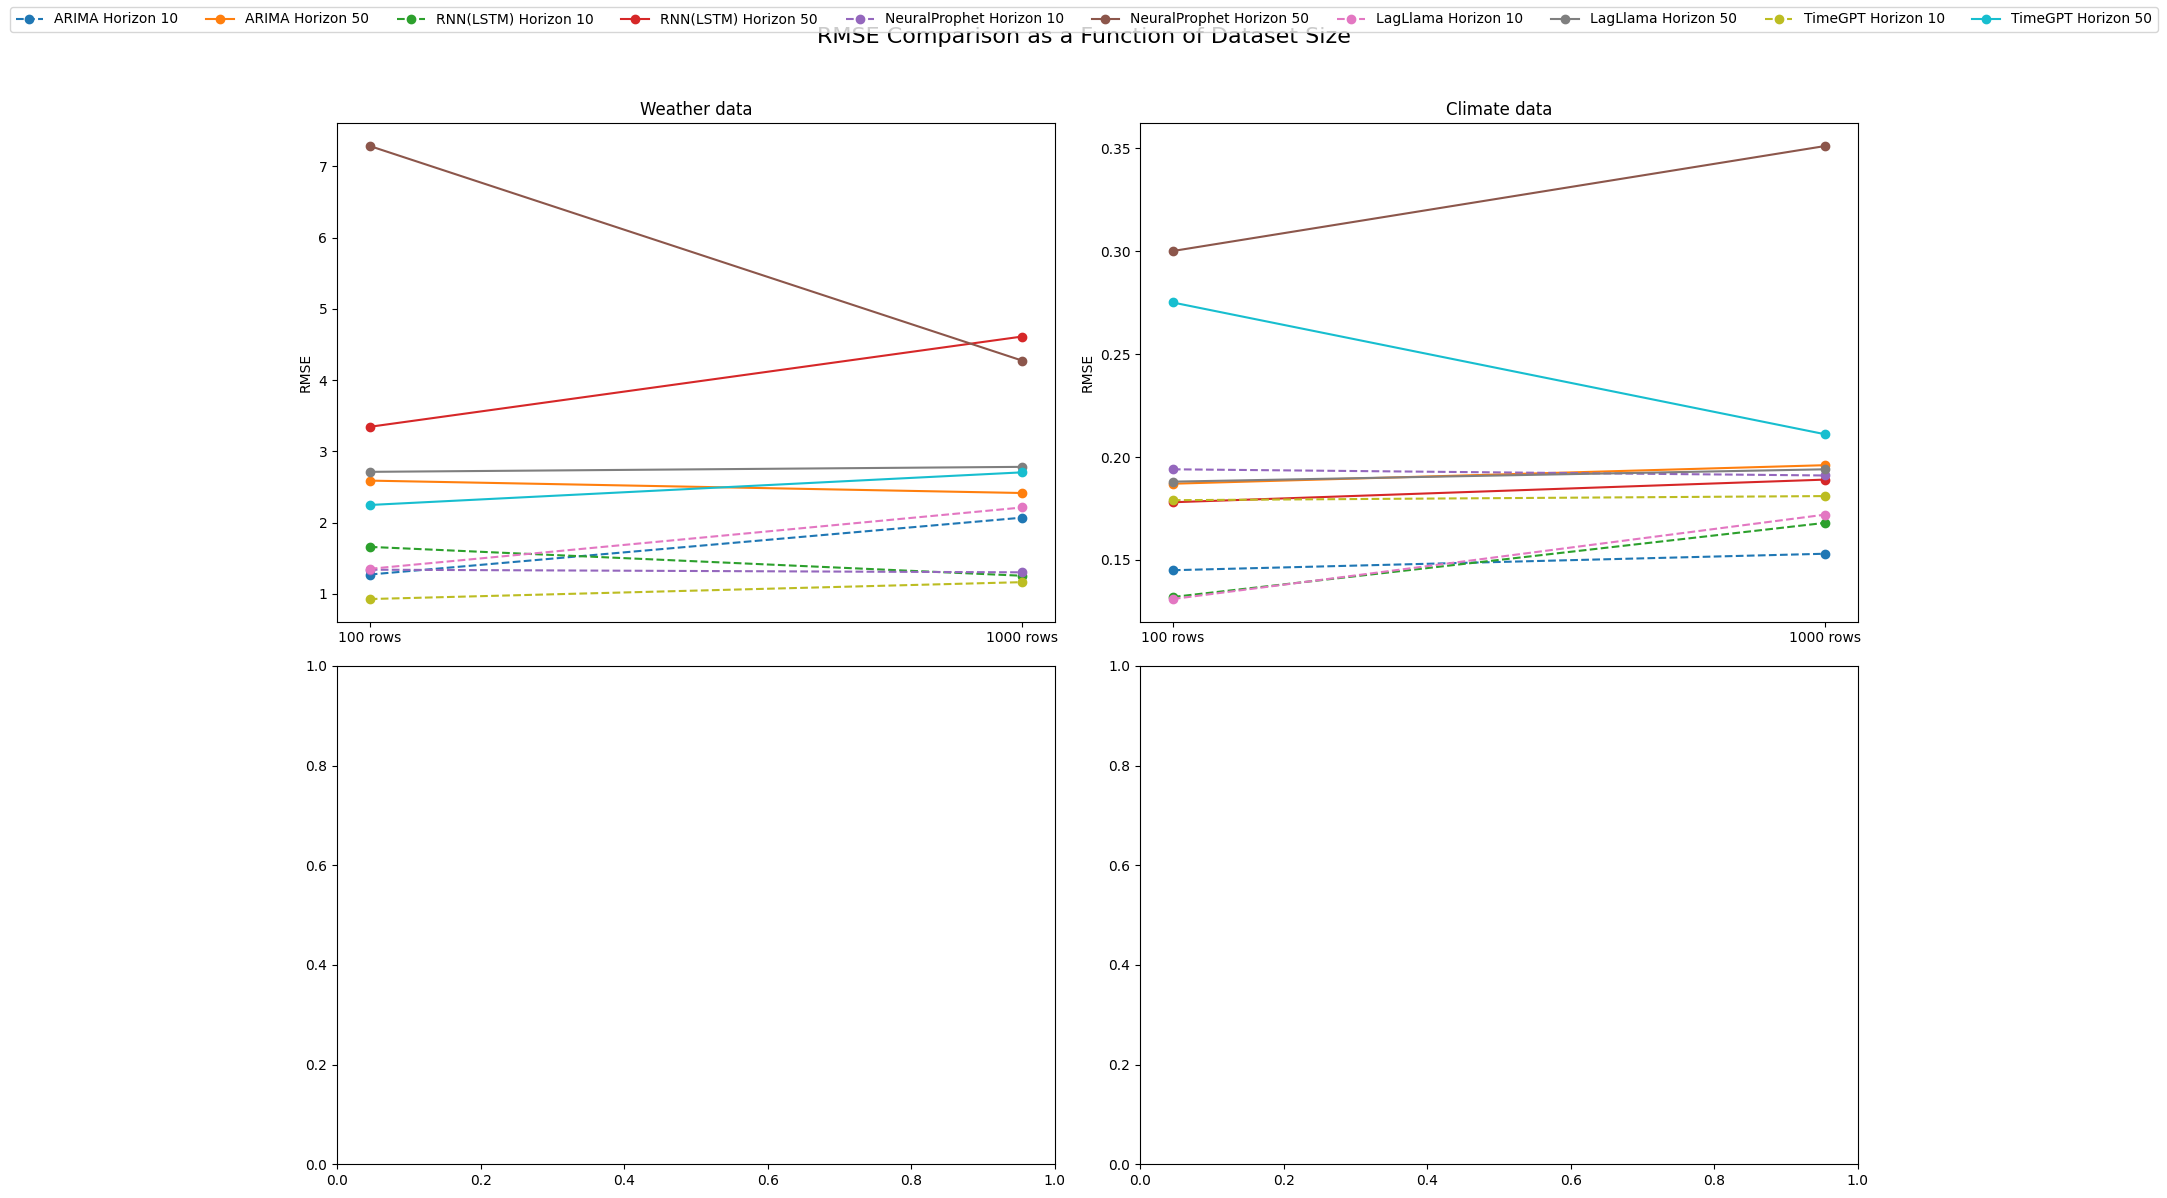

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Model': ['ARIMA', 'RNN(LSTM)', 'NeuralProphet', 'LagLlama', 'TimeGPT'],
    '100_weather_10': [1.271, 1.659, 1.339, 1.351, 0.927],
    '100_weather_50': [2.589, 3.344, 7.285, 2.712, 2.247],
    '100_climate_10': [0.145, 0.132, 0.194, 0.131, 0.179],
    '100_climate_50': [0.187, 0.178, 0.300, 0.188, 0.275],
    '1000_weather_10': [2.069, 1.254, 1.302, 2.212, 1.164],
    '1000_weather_50': [2.415, 4.611, 4.273, 2.782, 2.705],
    '1000_climate_10': [0.153, 0.168, 0.191, 0.172, 0.181],
    '1000_climate_50': [0.196, 0.189, 0.351, 0.194, 0.211]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(2,2, figsize=(16, 12))
fig.suptitle('RMSE Comparison as a Function of Dataset Size', fontsize=16)

# Define a function to create each subplot
def plot_rmse_by_size(ax, df, horizon_10_100_col, horizon_50_100_col, horizon_10_1000_col, horizon_50_1000_col, title):
    for index, row in df.iterrows():
        ax.plot([0, 1], [row[horizon_10_100_col], row[horizon_10_1000_col]], label=row['Model'] + ' Horizon 10', marker='o', linestyle='--')
        ax.plot([0, 1], [row[horizon_50_100_col], row[horizon_50_1000_col]], label=row['Model'] + ' Horizon 50', marker='o')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['100 rows', '1000 rows'])
    ax.set_title(title)
    ax.set_ylabel('RMSE')

# Plot 1: Weather data
plot_rmse_by_size(axes[0, 0], df, '100_weather_10', '100_weather_50', '1000_weather_10', '1000_weather_50', 'Weather data')

# Plot 2: Climate data
plot_rmse_by_size(axes[0, 1], df, '100_climate_10', '100_climate_50', '1000_climate_10', '1000_climate_50', 'Climate data')

# Combine legends
handles, labels = [], []
for ax in axes.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', ncol=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

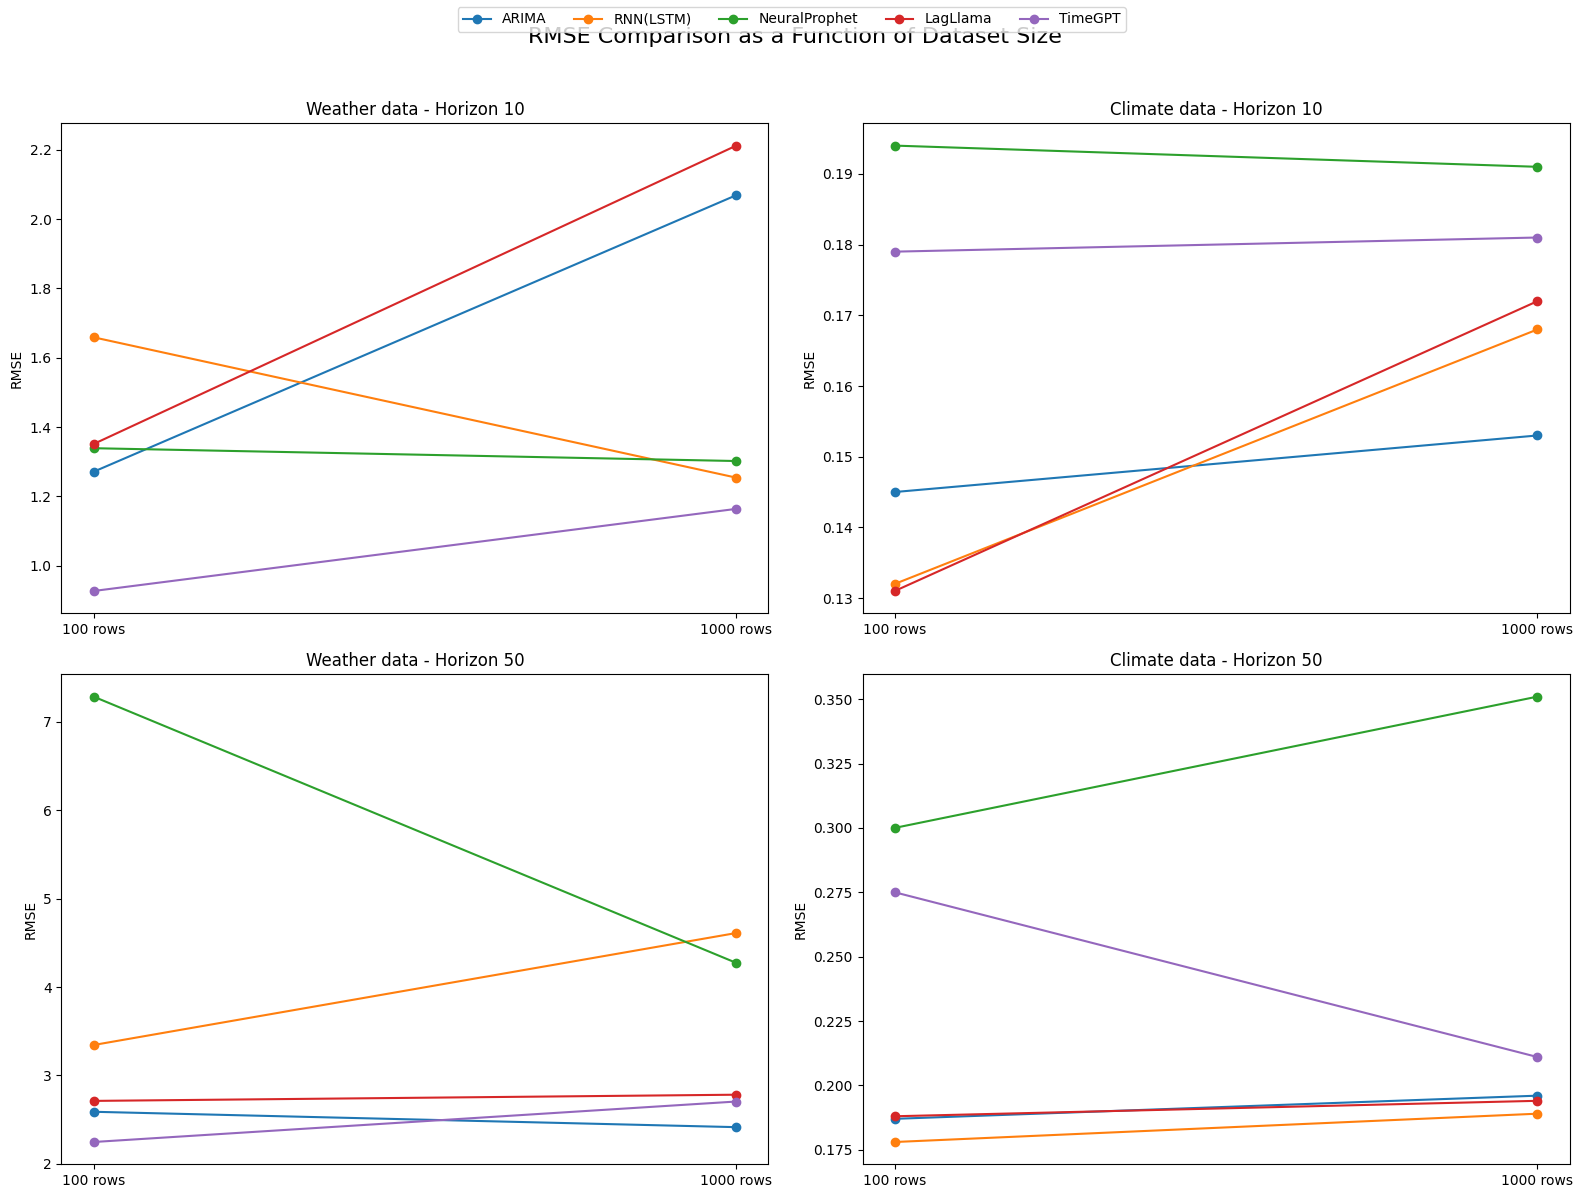

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Model': ['ARIMA', 'RNN(LSTM)', 'NeuralProphet', 'LagLlama', 'TimeGPT'],
    '100_weather_10': [1.271, 1.659, 1.339, 1.351, 0.927],
    '100_weather_50': [2.589, 3.344, 7.285, 2.712, 2.247],
    '100_climate_10': [0.145, 0.132, 0.194, 0.131, 0.179],
    '100_climate_50': [0.187, 0.178, 0.300, 0.188, 0.275],
    '1000_weather_10': [2.069, 1.254, 1.302, 2.212, 1.164],
    '1000_weather_50': [2.415, 4.611, 4.273, 2.782, 2.705],
    '1000_climate_10': [0.153, 0.168, 0.191, 0.172, 0.181],
    '1000_climate_50': [0.196, 0.189, 0.351, 0.194, 0.211]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RMSE Comparison as a Function of Dataset Size', fontsize=16)

# Define a function to create each subplot
def plot_rmse_by_size(ax, df, horizon_col_100, horizon_col_1000, title):
    for index, row in df.iterrows():
        ax.plot([0, 1], [row[horizon_col_100], row[horizon_col_1000]], label=row['Model'], marker='o')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['100 rows', '1000 rows'])
    ax.set_title(title)
    ax.set_ylabel('RMSE')

# Plot 1: 100 rows vs. 1000 rows, Weather data, Horizon 10
plot_rmse_by_size(axes[0, 0], df, '100_weather_10', '1000_weather_10', 'Weather data - Horizon 10')

# Plot 2: 100 rows vs. 1000 rows, Climate data, Horizon 10
plot_rmse_by_size(axes[0, 1], df, '100_climate_10', '1000_climate_10', 'Climate data - Horizon 10')

# Plot 3: 100 rows vs. 1000 rows, Weather data, Horizon 50
plot_rmse_by_size(axes[1, 0], df, '100_weather_50', '1000_weather_50', 'Weather data - Horizon 50')

# Plot 4: 100 rows vs. 1000 rows, Climate data, Horizon 50
plot_rmse_by_size(axes[1, 1], df, '100_climate_50', '1000_climate_50', 'Climate data - Horizon 50')


# Combine legends
handles, labels = [], []
for ax in axes.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', ncol=5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

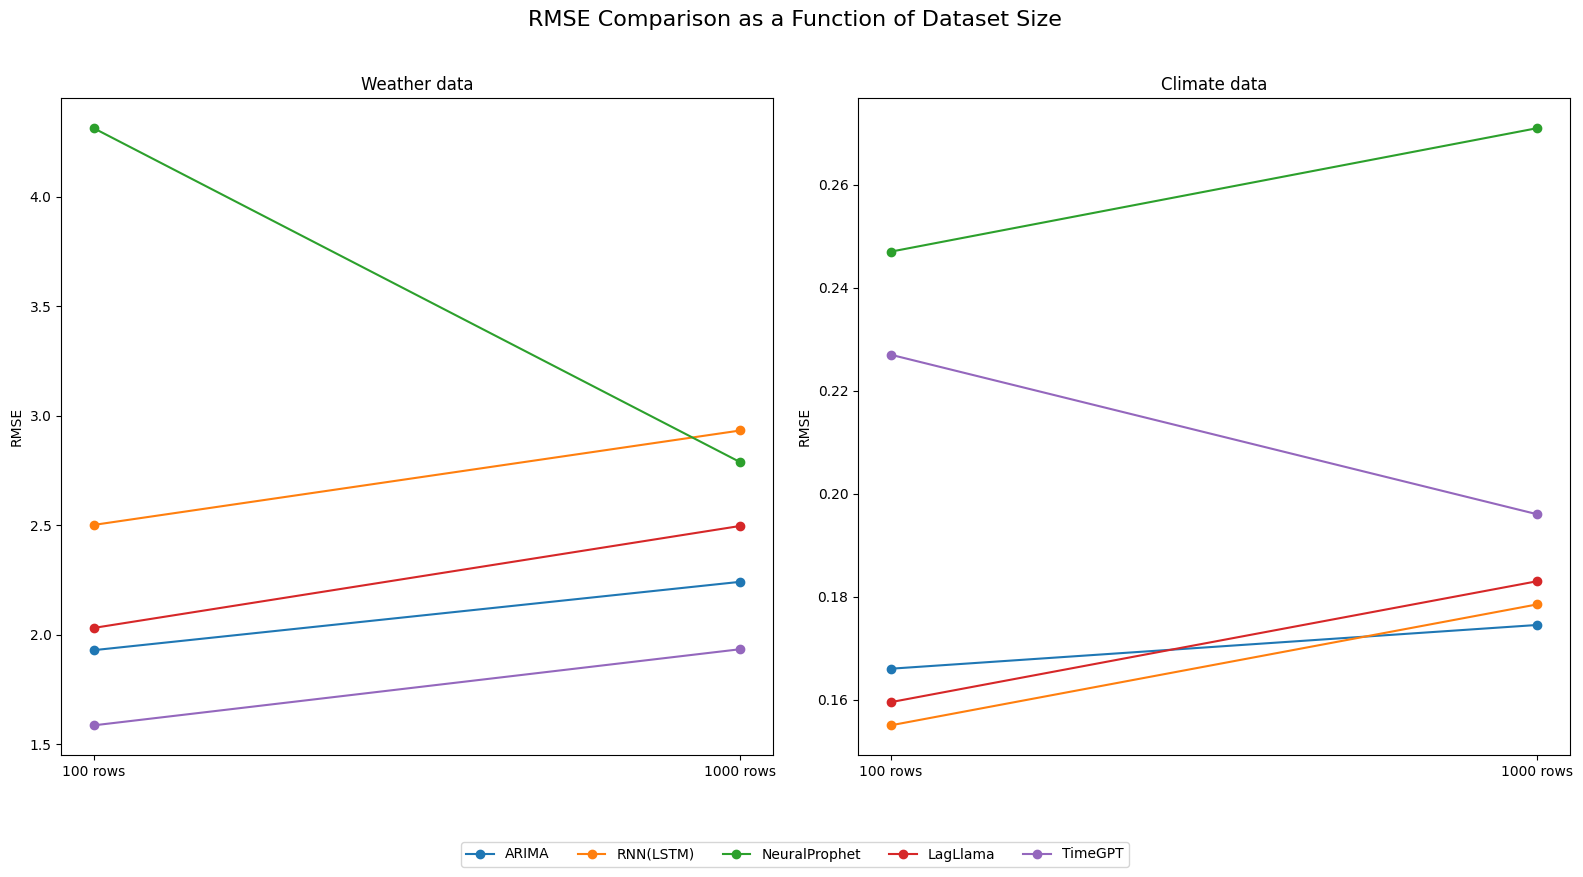

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Model': ['ARIMA', 'RNN(LSTM)', 'NeuralProphet', 'LagLlama', 'TimeGPT'],
    '100_weather_10': [1.271, 1.659, 1.339, 1.351, 0.927],
    '100_weather_50': [2.589, 3.344, 7.285, 2.712, 2.247],
    '100_climate_10': [0.145, 0.132, 0.194, 0.131, 0.179],
    '100_climate_50': [0.187, 0.178, 0.300, 0.188, 0.275],
    '1000_weather_10': [2.069, 1.254, 1.302, 2.212, 1.164],
    '1000_weather_50': [2.415, 4.611, 4.273, 2.782, 2.705],
    '1000_climate_10': [0.153, 0.168, 0.191, 0.172, 0.181],
    '1000_climate_50': [0.196, 0.189, 0.351, 0.194, 0.211]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate the average RMSE for each Model and dataset size
df['avg_weather_100'] = (df['100_weather_10'] + df['100_weather_50']) / 2
df['avg_weather_1000'] = (df['1000_weather_10'] + df['1000_weather_50']) / 2
df['avg_climate_100'] = (df['100_climate_10'] + df['100_climate_50']) / 2
df['avg_climate_1000'] = (df['1000_climate_10'] + df['1000_climate_50']) / 2

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('RMSE Comparison as a Function of Dataset Size', fontsize=16)

# Define a function to create each subplot
def plot_rmse_by_size(ax, df, avg_col_100, avg_col_1000, title):
    for index, row in df.iterrows():
        ax.plot([0, 1], [row[avg_col_100], row[avg_col_1000]], label=row['Model'], marker='o')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['100 rows', '1000 rows'])
    ax.set_title(title)
    ax.set_ylabel('RMSE')

# Plot 1: 100 rows vs. 1000 rows, Weather data
plot_rmse_by_size(axes[0], df, 'avg_weather_100', 'avg_weather_1000', 'Weather data')

# Plot 2: 100 rows vs. 1000 rows, Climate data
plot_rmse_by_size(axes[1], df, 'avg_climate_100', 'avg_climate_1000', 'Climate data')

# Combine legends
handles, labels = [], []
for ax in axes.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()